<a href="https://www.kaggle.com/code/tomasguzmana/penisilin-analisis?scriptVersionId=113057188" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
from sklearn import preprocessing,neighbors
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.svm import SVC

In [2]:
df=pd.read_csv('/kaggle/input/big-databiopharmaceutical-manufacturing/Mendeley_data/100_Batches_IndPenSim_Statistics.csv')
df.drop(['Batch ref'],1,inplace=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [3]:
X=np.array(df.drop(['Fault ref(0-NoFault 1-Fault)'],1))
y=np.array(df['Fault ref(0-NoFault 1-Fault)'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
clf=neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [5]:
accurracy=clf.score(X_test, y_test)
print(f'{accurracy*100} %')

90.0 %


In [6]:
df

,Penicllin_harvested_during_batch(kg),Penicllin_harvested_end_of_batch (kg),Penicllin_yield_total (kg),Fault ref(0-NoFault 1-Fault)
0,1066400.0,1720000.0,2786400.0,0
1,985910.0,1340100.0,2326000.0,0
2,1416100.0,1259200.0,2675300.0,0
3,815700.0,1071000.0,1886700.0,0
4,1128500.0,2434400.0,3562900.0,0
...,...,...,...,...
95,1141500.0,2453400.0,3595000.0,1
96,1439400.0,2454900.0,3894300.0,1
97,799760.0,930830.0,1730600.0,1
98,388650.0,502180.0,890830.0,1


In [7]:
example_measures = np.array([753080.0,801930.0,1555000.0])
example_measures = example_measures.reshape(1, -1)
prediction=clf.predict(example_measures)
print(prediction)

[0]


In [8]:
df.dtypes
df['Penicllin_harvested_during_batch(kg)'].astype(int)

0     1066400
1      985910
2     1416100
3      815700
4     1128500
       ...   
95    1141500
96    1439400
97     799760
98     388650
99     753080
Name: Penicllin_harvested_during_batch(kg), Length: 100, dtype: int64

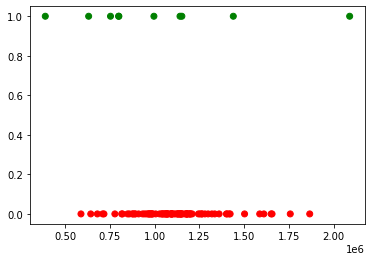

In [9]:
colormap = np.array(['r', 'g', 'b'])
x=np.array(df['Penicllin_harvested_during_batch(kg)'],df['Penicllin_harvested_end_of_batch (kg)'])
plt.scatter(x,df['Fault ref(0-NoFault 1-Fault)'],c=colormap[df['Fault ref(0-NoFault 1-Fault)']])
plt.show()

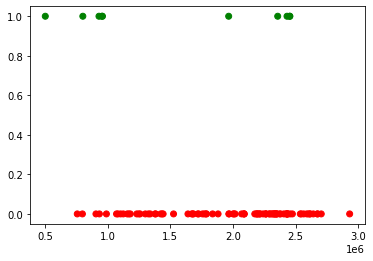

In [10]:
colormap = np.array(['r', 'g', 'b'])
plt.scatter(df['Penicllin_harvested_end_of_batch (kg)'],df['Fault ref(0-NoFault 1-Fault)'],c=colormap[df['Fault ref(0-NoFault 1-Fault)']])
plt.show()

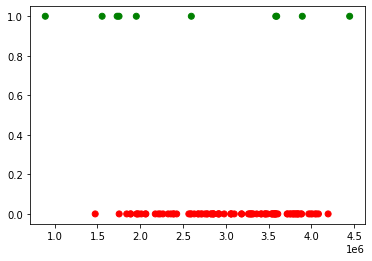

In [11]:
colormap = np.array(['r', 'g', 'b'])
plt.scatter(df['Penicllin_yield_total (kg)'],df['Fault ref(0-NoFault 1-Fault)'],c=colormap[df['Fault ref(0-NoFault 1-Fault)']])
plt.show()

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
clf2=SVC()
clf2.fit(X_train, y_train)
accurracy2=clf2.score(X_test, y_test)
print(f'{accurracy2*100} %')

85.0 %
